# Project: Investigating TMDb movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Introduction'></a>
## Introduction

### Overview

To complete Data analysis using TMDb Movies Dataset, This Dataset contains about 10000 movies which includes user ratings , revenue and other 19 columns.

Questions that can be answered fromt this dataset are:
    1. Movies which had lowest and highest profit
    2. Movies with lowest and highest budget
    3. Movies with lowest and highest revenue
    4. Movies with lowest and highest runtime
    5. Mean runtime of the movies
    
    1. Year of release vs Profitability
    2. Actor with Most Screenplay
    3. Average Budget of the movies
    4. Average revenue earned by the movies
    5. Average duration of the movies


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import statsmodels as stats
import csv
from datetime import datetime
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> after perusing the dataset and having had the necessary questions , we will be keeping only relevant data deleting the unused data so our analysis becomes easy and understandable

### General Properties

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#loading the csv file and storing it in the variable df
df = pd.read_csv('tmdb-movies.csv')

#printing the first five rows of the df database
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


To find the total number of rows and columns

In [6]:
df.shape

(10866, 21)

Names of columns present in df dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

To find if there are any null values in the df dataset

In [8]:
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

### Observations from the dataset
1. Vote count is different in all the movies , we cannot determine the  popularity of movies based on average vote count.

2. Currency Unit is not specified in the dataset.

### Data Cleaning (Removing unnecessary from dataset df)

### Notable observations from the dataset
1. unused columns such as id, imdb_id, vote_count, production_company, keywords, homepage has to be removed.
2. Discarding the movies that have zero revenue or budget , no value has been recorded.
3. Removing the duplicated values in the rows(if found)
4. changing release date column into date format.
5. changing the format of budget and revenue column.
6. replacing zero with NaN in runtime column.

 **1. Removing Unused Columns**

Columns that need to be deleted are - id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average.

In [9]:
# After discussing the structure of the data and any problems that need to be
# creating a list of columns to be removed

dele = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

#removing the columns

df = df.drop(dele,1)

#previewing the new dataset

df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


**2. Removing 0 from budget and revenue columns**

In [10]:
#creating a sepearate list containing budget and revenue
temp = ['budget','revenue']
#replacing all values from NAN to '0'
df[temp] = df[temp].replace(0,np.NAN)
#removing all the rows that have NAN value
df.dropna(subset = temp , inplace = True)

rows , col = df.shape

**3. Removing the duplicated values in the rows(if found)**

In [11]:
rows , col = df.shape
df.drop_duplicates(keep ='first',inplace = True)
print('there are {} total entries of movies and {} number of columns in it.'.format(rows-1,col))

there are 3854 total entries of movies and 10 number of columns in it.


**4. Changing release date column into date format.**

In [12]:
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


**5. Changing the format of budget and revenue column.**

In [13]:
#to show what datatypes is present in Dataset
df.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [14]:
#Converting Float64 to Int64
change = ['budget','revenue']
df[change] = df[change].applymap(np.int64)
df.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

**6. Replacing zero with NaN in runtime column.**

In [15]:
df['runtime'] = df['runtime'].replace(0,np.NAN)
df.runtime.isnull().any()

False

<a id='eda'></a>
## Exploratory Data Analysis




**Calculating Profit for each movie**

In [16]:
df.insert(2,'profit_earned',df['revenue']-df['budget'])
df.head()

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


### Research Question 1 : Movies which had lowest and highest profit

In [17]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
import pprint

def calc(column):
   
    low = df[column].idxmin()
    low_detail = pd.DataFrame(df.loc[low])
    
    high = df[column].idxmax()
    high_detail = pd.DataFrame(df.loc[high])
    
    info = pd.concat([high_detail , low_detail],axis =1)
    
    return info

calc('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Research Question 2 : Movies with lowest and highest budget

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
calc('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Research Question 3 : Movies with lowest and highest revenue

In [19]:
calc('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### Research Question 4 : Movies with lowest and highest runtime

In [20]:
calc('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Research Question 5 : Mean runtime of the movies

In [21]:
def avge(column):
    return df[column].mean()
avge('runtime')

109.22029060716139

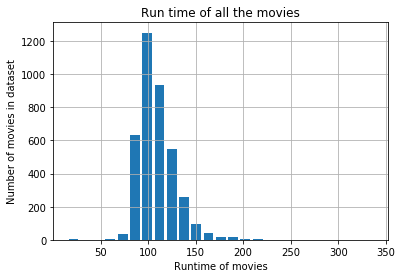

In [22]:
#plotting histogram of runtime of movies
plt.xlabel('Runtime of movies')
plt.ylabel('Number of movies in dataset')
plt.title('Run time of all the movies')
plt.hist(df['runtime'],rwidth =0.8,bins =25)
plt.grid()
plt.show()

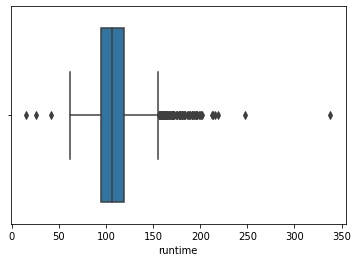

In [23]:
sn.boxplot(df['runtime'])
plt.show()

In [24]:
df['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

The histogram is positively skewed with a runtime around 80 to 120 minutes.

### Research Question 6: Year of release vs Profitability

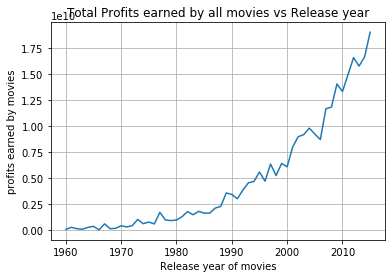

In [25]:
profit_year = df.groupby('release_year')['profit_earned'].sum()
plt.plot(profit_year)
plt.title('Total Profits earned by all movies vs Release year')
plt.xlabel('Release year of movies')
plt.ylabel('profits earned by movies')
plt.grid()
plt.show()

In [26]:
#to find which year made the highest profit?
profit_year.idxmax()

2015

In [27]:
#keeping 40 million as significant profit amount.the data is cleaned.
profit_data = df[df['profit_earned'] >= 40000000]
profit_data.index = range(len(profit_data))
profit_data.index = profit_data.index + 1
profit_data.head()

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [28]:
len(profit_data)

1493

In [29]:
def data(column):
    data = profit_data[column].str.cat(sep='|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    return count

In [30]:
count = data('genres')
count.head()

Drama        554
Comedy       542
Action       505
Thriller     454
Adventure    402
dtype: int64

### Research Question 7: Actor with Most Screenplay

In [31]:
count = data('cast')
count.head()

Tom Cruise      27
Tom Hanks       26
Brad Pitt       25
Cameron Diaz    22
Bruce Willis    21
dtype: int64

### Research Question 8: Average Budget of the movies

In [32]:
def profit_avge(column):
    return profit_data[column].mean()
profit_avge('budget')

57308877.08305425

### Research Question 9: Average revenue earned by the movies

In [33]:
profit_avge('revenue')

236306323.37374413

### Research Question : Average duration of the movies

In [34]:
profit_avge('runtime')

113.19624916275954

<a id='conclusions'></a>
## Conclusions

The following conclusions can be made from the data analysis:
**for a movie to be successful**

1. Average budget should be around 58 million

2. Any one these actors should be casted: Tom Cruise, Brad Pitt, Tom Hanks,    Sylvester Stallone,Cameron Diaz

3. Average duration of the movie should be 113 minutes

having these parameters, there is a higher possibility that a movie can become a hit with an average revenue around 236 million.

Limitations: In this Analysis several other real life influceing factors were neglected. This might not be completely error free but having these suggestions can increase the probability of the movie to become a hit. 

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295